In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 读取数据round1_ijcai_18_train_20180301.txt

In [4]:
df_origin = pd.read_table('round1_ijcai_18_train_20180301.txt',sep=' ')

先查看下数据

In [5]:
df_origin.head(5)

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4006,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4016,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0


In [6]:
df_origin.shape

(478138, 27)

In [7]:
df_origin.count()

instance_id                  478138
item_id                      478138
item_category_list           478138
item_property_list           478138
item_brand_id                478138
item_city_id                 478138
item_price_level             478138
item_sales_level             478138
item_collected_level         478138
item_pv_level                478138
user_id                      478138
user_gender_id               478138
user_age_level               478138
user_occupation_id           478138
user_star_level              478138
context_id                   478138
context_timestamp            478138
context_page_id              478138
predict_category_property    478138
shop_id                      478138
shop_review_num_level        478138
shop_review_positive_rate    478138
shop_star_level              478138
shop_score_service           478138
shop_score_delivery          478138
shop_score_description       478138
is_trade                     478138
dtype: int64

数据完整，没有缺省值

In [8]:
df_origin.dtypes

instance_id                    int64
item_id                        int64
item_category_list            object
item_property_list            object
item_brand_id                  int64
item_city_id                   int64
item_price_level               int64
item_sales_level               int64
item_collected_level           int64
item_pv_level                  int64
user_id                        int64
user_gender_id                 int64
user_age_level                 int64
user_occupation_id             int64
user_star_level                int64
context_id                     int64
context_timestamp              int64
context_page_id                int64
predict_category_property     object
shop_id                        int64
shop_review_num_level          int64
shop_review_positive_rate    float64
shop_star_level                int64
shop_score_service           float64
shop_score_delivery          float64
shop_score_description       float64
is_trade                       int64
d

In [9]:
#产生购买的记录数量
df_origin[['is_trade']].sum()

is_trade    9021
dtype: int64

In [10]:
#总体购买转化率
df_origin[['is_trade']].sum()/df_origin[['is_trade']].count()

is_trade    0.018867
dtype: float64

In [9]:
#数据时间分布
df_origin[['context_timestamp']].max()

context_timestamp    1537804787
dtype: int64

In [10]:
df_origin[['shop_id']].nunique()

shop_id    3959
dtype: int64

In [11]:
df_origin[['item_id']].nunique()

item_id    10075
dtype: int64

In [12]:
df_origin[['item_brand_id']].nunique()

item_brand_id    2055
dtype: int64

In [13]:
df_origin[['user_id']].nunique()

user_id    197694
dtype: int64

In [14]:
df_origin[['user_gender_id','user_id']].groupby('user_gender_id').nunique()

,user_gender_id,user_id
user_gender_id,,
-1,1,5548
0,1,148653
1,1,39333
2,1,4584


In [11]:
df_origin[['user_gender_id','user_id']].groupby('user_gender_id').count()

,user_id
user_gender_id,
-1,12902
0,360817
1,94070
2,10349


In [15]:
df_origin[['user_gender_id','is_trade']].groupby('user_gender_id').sum()

,is_trade
user_gender_id,
-1,166
0,6666
1,1994
2,195


In [16]:
forpic1=df_origin[["is_trade","shop_id","shop_review_num_level","shop_review_positive_rate","shop_star_level","shop_score_service","shop_score_delivery","shop_score_description"]]
pairplot_param={"hue":"is_trade"}
# sns.pairplot(forpic1)

In [17]:
# 来看看相关度咯
forcorr=df_origin[["is_trade","shop_id","shop_review_num_level","shop_review_positive_rate","shop_star_level","shop_score_service","shop_score_delivery","shop_score_description","item_brand_id","item_city_id","item_price_level","item_sales_level","item_collected_level","item_pv_level"]]
corr = forcorr.corr()
corr

,is_trade,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level
is_trade,1.000000,-0.003238,-0.000747,-0.017355,-0.000735,-0.015578,-0.016239,-0.016734,-0.005311,-0.014622,-0.055895,0.037358,0.013972,0.006077
shop_id,-0.003238,1.000000,0.070676,0.029416,0.077010,0.026883,0.025032,0.022326,0.123670,-0.044146,-0.008429,0.012862,0.039910,0.042454
shop_review_num_level,-0.000747,0.070676,1.000000,0.168541,0.986987,0.021485,0.030958,0.070605,-0.009858,-0.040660,0.045727,0.463273,0.496431,0.328187
shop_review_positive_rate,-0.017355,0.029416,0.168541,1.000000,0.166854,0.329895,0.322094,0.465756,-0.095923,0.007857,0.341513,0.170366,0.206513,0.220753
shop_star_level,-0.000735,0.077010,0.986987,0.166854,1.000000,0.023166,0.032611,0.068930,-0.005102,-0.029254,0.048414,0.459293,0.495634,0.322467
shop_score_service,-0.015578,0.026883,0.021485,0.329895,0.023166,1.000000,0.994216,0.938355,0.018065,-0.036715,0.100911,-0.008801,0.034895,0.029599
shop_score_delivery,-0.016239,0.025032,0.030958,0.322094,0.032611,0.994216,1.000000,0.931128,0.013355,-0.045973,0.099274,-0.012572,0.032269,0.023327
shop_score_description,-0.016734,0.022326,0.070605,0.465756,0.068930,0.938355,0.931128,1.000000,-0.060349,-0.004456,0.228606,0.097055,0.126126,0.148225
item_brand_id,-0.005311,0.123670,-0.009858,-0.095923,-0.005102,0.018065,0.013355,-0.060349,1.000000,-0.086435,-0.098667,-0.060640,-0.060614,-0.031810
item_city_id,-0.014622,-0.044146,-0.040660,0.007857,-0.029254,-0.036715,-0.045973,-0.004456,-0.086435,1.000000,0.240088,-0.028618,0.010698,0.020906


<Figure size 432x288 with 0 Axes>

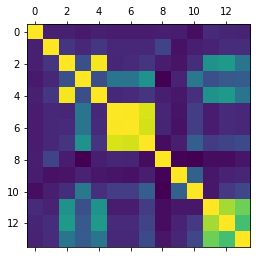

In [18]:
# 用颜色深浅来表示相关度
plt.figure()
plt.matshow(corr)
plt.show()

In [34]:
#拆分时间到日，绘制折线图 pv 成交
df_origin['time'] = pd.to_datetime(df_origin.context_timestamp, unit='s')
df_origin['day'] = df_origin['time'].apply(lambda x: int(str(x)[8:10]))
trade_cnt=df_origin.groupby('day',as_index=False).agg({'is_trade':'sum'})
pv=df_origin.groupby('day',as_index=False).agg({'is_trade':'count'})
trade_cnt.columns=['day','trade_cnt']
pv.columns=['day','pv']
df_origin=df_origin.merge(trade_cnt,on=['day'],how='left')
df_origin=df_origin.merge(pv,on=['day'],how='left')

In [38]:
trend_pic=pv.merge(trade_cnt,on=['day'],how='left')

In [41]:
trend_pic

,day,pv,trade_cnt
0,17,6659,147
1,18,77494,1536
2,19,70458,1389
3,20,68681,1322
4,21,71236,1356
5,22,68213,1304
6,23,62869,1084
7,24,52528,883


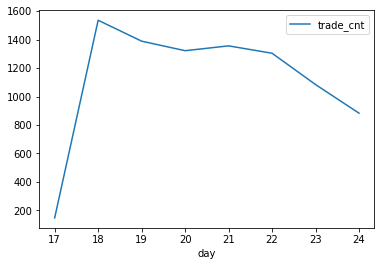

In [44]:
trend_pic.plot(kind='line',x='day', y=['trade_cnt'])

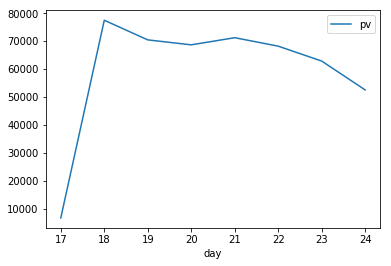

In [43]:
trend_pic.plot(kind='line',x='day', y=['pv'])

In [20]:
# 独立店铺数 3959
len(df_origin['shop_id'].unique())

3959

In [21]:
df_origin.groupby('shop_id').agg({'is_trade':'sum'}).head()

,is_trade
shop_id,
1543559655939246,0
6515295840140210,3
9230153951388399,1
10653466129289268,0
12057125006548226,1


In [22]:
df_origin['is_trade'].sum()

9021

In [23]:
df_train=df_origin[['shop_id','item_id','is_trade','shop_review_num_level','shop_review_positive_rate','shop_star_level','shop_score_service','shop_score_delivery','shop_score_description','item_brand_id','item_city_id','item_price_level','item_sales_level','item_collected_level','item_pv_level']].groupby(['shop_id','item_id']) \
.agg({'is_trade':lambda x: x.sum()/x.count(),'shop_review_num_level':'mean','shop_review_positive_rate':'mean','shop_star_level':'mean','shop_score_service':'mean','shop_score_delivery':'mean','shop_score_description':'mean','item_brand_id':'mean','item_city_id':'mean','item_price_level':'mean','item_sales_level':'mean','item_collected_level':'mean','item_pv_level':'mean'})
df_train.head(10)
# df_train['is_trade'].transform(lambda x: x.sum()/x.count())

is_trade  shop_review_num_level  \
shop_id           item_id                                                
1543559655939246  7806635514564766299  0.000000                   17.0   
                  8159368884575927001  0.000000                   17.0   
6515295840140210  2455538633397893348  0.047619                   14.0   
                  5655832228187215020  0.500000                   14.0   
                  5707048696330942023  0.000000                   14.0   
9230153951388399  2185554875838380422  0.032258                   11.0   
                  2226120514471475017  0.000000                   11.0   
                  3403739788483962878  0.000000                   11.0   
10653466129289268 3989767131983327826  0.000000                   10.0   
                  4191633528118192451  0.000000                   10.0   

                                       shop_review_positive_rate  \
shop_id           item_id                                          
1543559655939246  7806635514564766299                   0.993880   
                  8159368884575927001                   0.993878   
6515295840140210  2455538633397893348                   0.989089   
                  5655832228187215020                   0.989062   
                  5707048696330942023                   0.989108   
9230153951388399  2185554875838380422                   0.967045   
                  2226120514471475017                   0.967118   
                  3403739788483962878                   0.966815   
10653466129289268 3989767131983327826                   1.000000   
                  4191633528118192451                   1.000000   

                                       shop_star_level  shop_score_service  \
shop_id           item_id                                                    
1543559655939246  7806635514564766299           5014.0            0.975812   
                  8159368884575927001           5014.0            0.975844   
6515295840140210  2455538633397893348           5012.0            0.975688   
                  5655832228187215020           5012.0            0.975778   
                  5707048696330942023           5012.0            0.975683   
9230153951388399  2185554875838380422           5009.0            0.988311   
                  2226120514471475017           5009.0            0.988003   
                  3403739788483962878           5009.0            0.988361   
10653466129289268 3989767131983327826           5008.0            0.987758   
                  4191633528118192451           5008.0            0.987789   

                                       shop_score_delivery  \
shop_id           item_id                                    
1543559655939246  7806635514564766299             0.977763   
                  8159368884575927001             0.977768   
6515295840140210  2455538633397893348             0.975319   
                  5655832228187215020             0.975364   
                  5707048696330942023             0.975288   
9230153951388399  2185554875838380422             0.984677   
                  2226120514471475017             0.984416   
                  3403739788483962878             0.984650   
10653466129289268 3989767131983327826             0.989749   
                  4191633528118192451             0.989764   

                                       shop_score_description  item_brand_id  \
shop_id           item_id                                                      
1543559655939246  7806635514564766299                0.974726   3.584460e+17   
                  8159368884575927001                0.974632   3.584460e+17   
6515295840140210  2455538633397893348                0.973187   3.697251e+18   
                  5655832228187215020                0.973265   3.697251e+18   
                  5707048696330942023                0.973142   3.697251e+18   
9230153951388399  2185554875838380422                0.986542   7.838285e+18   
           

In [24]:
df_train.dtypes

is_trade                     float64
shop_review_num_level        float64
shop_review_positive_rate    float64
shop_star_level              float64
shop_score_service           float64
shop_score_delivery          float64
shop_score_description       float64
item_brand_id                float64
item_city_id                   int64
item_price_level             float64
item_sales_level             float64
item_collected_level         float64
item_pv_level                float64
dtype: object

In [25]:
# 独立城市标签
len(df_train['item_city_id'].unique())

956

In [26]:
# 独立品牌标签
len(df_train['item_brand_id'].unique())

4144

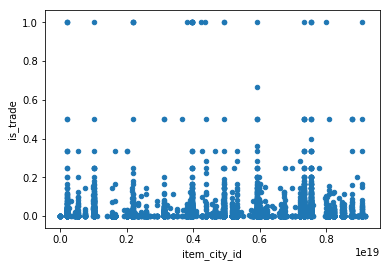

In [27]:
df_train.plot(kind='scatter',x='item_city_id', y='is_trade', marker='o')

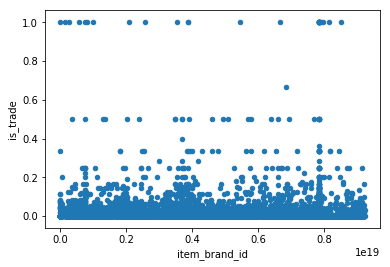

In [28]:
df_train.plot(kind='scatter',x='item_brand_id', y='is_trade', marker='o')
plt.show()

In [29]:
# df_origin.plot(kind='line',y='is_trade',x='context_timestamp')

In [30]:
import xgboost as xgb
from xgboost import XGBRegressor as xgbr
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [31]:
# 划分训练集和测试集
y=df_train[['is_trade']]
X=df_train.drop('is_trade', axis=1)

In [32]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# title = "Learning Curves (xgbc, n_estimators = 100)"
# cv = ShuffleSplit(df_train.shape[0],test_size=0.2, random_state=0)
# estimator = xgbr(n_estimators = 10,objective='reg:logistic')
# plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=8)

# plt.show()

In [33]:
# param=dict()
# param['gpu_id'] = 1
# param['max_bin'] = -1
# param['tree_method'] = 'gpu_hist'
# xgb.train(param,xgb.DMatrix(X),label='is_trade',evals=(xgb.DMatrix(y),'test'))